In [76]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.display import display, HTML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
    import plotly.express as px
import folium
import plotly.graph_objects as go
import seaborn as sns
import ipywidgets as widgets
import imblearn

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
zeroaccess_df = pd.read_csv('zeroaccess.csv')
state_df = pd.read_csv('state-internets.csv')
county_df = pd.read_csv('county-data.csv')

In [3]:
print(zeroaccess_df.shape ,state_df.shape ,county_df.shape)

(808446, 2) (49, 3) (3072, 6)


In [4]:
zeroaccess_df.head()

,lat,long
0,-10.0000,-55.0000
1,38.0888,-78.5592
2,38.9990,-84.6266
3,48.6210,7.4944
4,43.2342,-86.2484


In [5]:
state_df.head()

,state,population,internet
0,Alabama,4758191,3092273
1,Arizona,6665093,5230474
2,Arkansas,2919815,1949869
3,California,37350092,29758896
4,Colorado,5077553,4058749


In [6]:
county_df.head()

,subregion,region,pop,income,ipaddr,ufo2010
0,abbeville,south carolina,25101,34670,30330,2
1,acadia,louisiana,61912,37970,38203,6
2,accomack,virginia,33341,41595,41338,2
3,ada,idaho,409061,55304,1035427,59
4,adair,iowa,7481,47623,3762,0


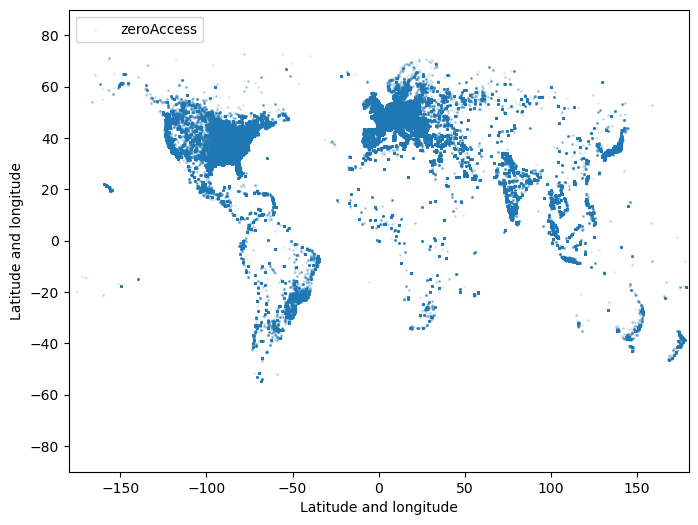

In [7]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.scatter(zeroaccess_df.long, zeroaccess_df.lat, alpha=0.1, s=1, label='zeroAccess')
ax.set_xlim((-180, 180))
ax.set_ylim((-90, 90))

plt.xlabel('Latitude and longitude')
plt.ylabel('Latitude and longitude')
plt.legend(loc='upper left')


plt.show()

In [8]:
import folium
from folium.plugins import HeatMap

mapa = folium.Map(location=(10,10), zoom_start=1.5, tiles='Stamen Toner', height="50%", width ="50%")
loc_li= list(zip(list(zeroaccess_df.lat), (zeroaccess_df.long)))[:1000]
HeatMap(loc_li, radius=15).add_to(mapa)
mapa

In [9]:
import reverse_geocoder


def rgr_batch(lat_long_df):
    cord_li=[]
    for ind in lat_long_df.index:
        cord_li.append((lat_long_df['lat'][ind], lat_long_df['long'][ind]))
    result_dict_li =reverse_geocoder.search(cord_li)
    return pd.DataFrame(result_dict_li).drop(['lat','lon'], axis=1)

In [10]:
sample_df = zeroaccess_df.head(50000)
country_df = rgr_batch(sample_df)
df=sample_df.join(country_df).rename(columns={'name': 'City', 'admin1': 'State', 'admin2' : 'County', 'cc': 'country_code'})

df


Loading formatted geocoded file...


,lat,long,City,State,County,country_code
0,-10.0000,-55.0000,Alta Floresta,Mato Grosso,Alta Floresta,BR
1,38.0888,-78.5592,Charlottesville,Virginia,City of Charlottesville,US
2,38.9990,-84.6266,Florence,Kentucky,Boone County,US
3,48.6210,7.4944,Marlenheim,Alsace,Departement du Bas-Rhin,FR
4,43.2342,-86.2484,Muskegon,Michigan,Muskegon County,US
...,...,...,...,...,...,...
49995,53.1271,18.0200,Bydgoszcz,Kujawsko-Pomorskie,Bydgoszcz,PL
49996,42.6757,-82.7773,New Baltimore,Michigan,Macomb County,US
49997,43.5417,21.7078,Aleksinac,Central Serbia,Nisavski Okrug,RS
49998,28.2397,-82.7388,New Port Richey,Florida,Pasco County,US


<function matplotlib.pyplot.show(close=None, block=None)>

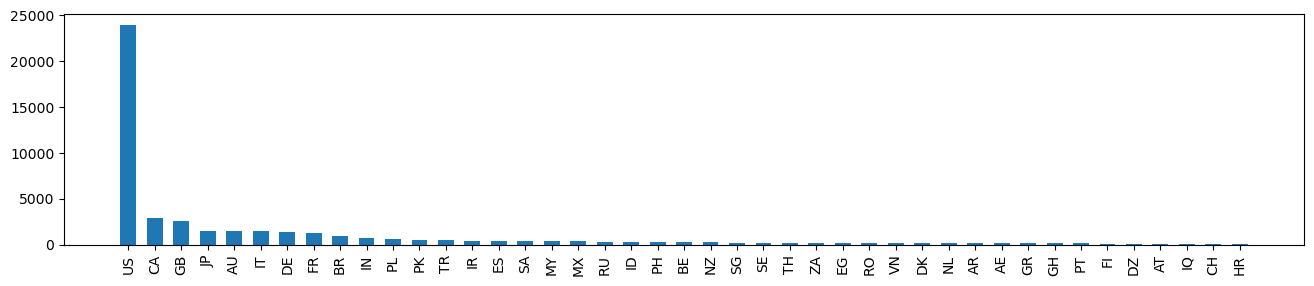

In [11]:
country_num = df.groupby(['country_code']).size().sort_values(ascending=False)
country_num = country_num[country_num.values >100]
plt.figure(figsize=(16,3))
plt.bar(country_num.index, country_num.values, width= 0.6)
plt.xticks(rotation='vertical')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

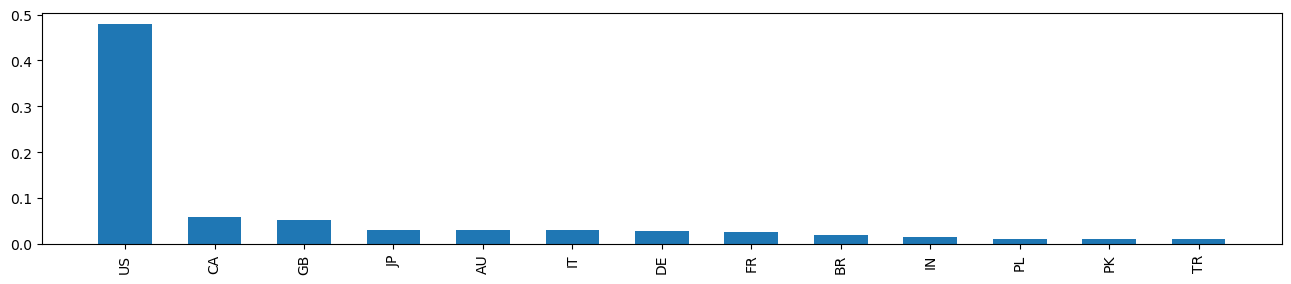

In [12]:
country_counts = df['country_code'].value_counts(normalize=True)
country_counts = country_counts[country_counts.values >0.01]

plt.figure(figsize=(16,3))
plt.bar(country_counts.index, country_counts.values, width=0.6)
plt.xticks(rotation='vertical')
plt.show

In [13]:
country_counts

US    0.47974
CA    0.05932
GB    0.05128
JP    0.03008
AU    0.03002
IT    0.02964
DE    0.02824
FR    0.02622
BR    0.01928
IN    0.01496
PL    0.01154
PK    0.01096
TR    0.01052
Name: country_code, dtype: float64

In [14]:
us_df= df[df['country_code']=='US']
us_df

,lat,long,City,State,County,country_code
1,38.0888,-78.5592,Charlottesville,Virginia,City of Charlottesville,US
2,38.9990,-84.6266,Florence,Kentucky,Boone County,US
4,43.2342,-86.2484,Muskegon,Michigan,Muskegon County,US
6,44.8012,-68.7778,Bangor,Maine,Penobscot County,US
8,36.0580,-88.8253,Bradford,Tennessee,Gibson County,US
...,...,...,...,...,...,...
49992,40.6374,-79.7264,Brackenridge,Pennsylvania,Allegheny County,US
49994,38.4380,-122.6753,Santa Rosa,California,Sonoma County,US
49996,42.6757,-82.7773,New Baltimore,Michigan,Macomb County,US
49998,28.2397,-82.7388,New Port Richey,Florida,Pasco County,US


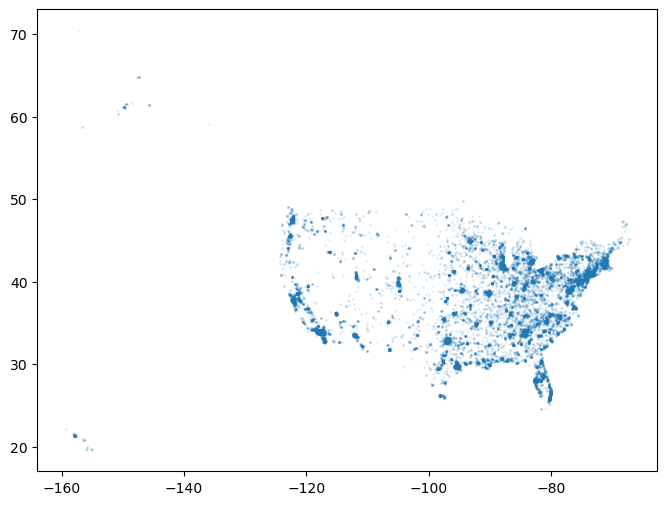

In [15]:
fig = plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)

ax.scatter(us_df.long, us_df.lat, alpha=0.1, s=1)
plt.show()

In [16]:
df.State.value_counts()[df.State.value_counts()>30]

England          2297
California       2293
Texas            2003
Florida          1425
Kansas           1371
                 ... 
Grad Zagreb        31
Shizuoka           31
Northern Cape      31
Vermont            31
Calabria           31
Name: State, Length: 215, dtype: int64

In [17]:
df.groupby(['State', 'City']).size().sort_values(ascending=False)

State               City                 
Kansas              Peabody                  1152
England             London                    453
Tokyo               Tokyo                     427
Islamabad           Islamabad                 319
England             City of London            300
                                             ... 
Nord-Pas-de-Calais  Lens                        1
                    Lambersart                  1
                    Lallaing                    1
                    La Bassee                   1
Midi-Pyrenees       Montesquieu-Volvestre       1
Length: 13138, dtype: int64

In [20]:
county = pd.read_csv("county-data.csv")
county =  county.groupby(by= ['subregion'])['pop', 'income', 'ipaddr', 'ufo2010'].sum()

us_count = us_df.groupby('State').size().sort_values(ascending=False).reset_index()
us_count.columns = ['state', 'attack']
us_count['att_pc'] = us_count['attack'] / us_count.attack.sum()
us_count = us_count.set_index(us_count['state'])
us_count.drop(['state'], axis=1, inplace=True)
us_pop = state_df[['state', 'population']]
us_pop['pop_pc'] = state_df.population / state_df.population.sum()
us_pop = us_pop.set_index(us_pop['state'])
us_pop.drop(['state'], axis=1, inplace=True)
att_pop = pd.concat([us_count['attack'], us_count['att_pc'], us_pop['pop_pc']], axis=1, sort=False)
county.head()
att_pop.sort_index()
lower_index =  [each.lower() for each in att_pop.index]
att_pop = att_pop.set_index(pd.Index(lower_index))
country_att_pop = county.merge(att_pop, left_index = True, right_index =True)
country_att_pop

C:\Users\rikar\AppData\Local\Temp\ipykernel_18400\1613183723.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  county =  county.groupby(by= ['subregion'])['pop', 'income', 'ipaddr', 'ufo2010'].sum()


,pop,income,ipaddr,ufo2010,attack,att_pc,pop_pc
arkansas,18892,38986,9733,0,262.0,0.010923,0.009473
colorado,20696,43252,8890,3,394.0,0.016426,0.016474
delaware,965814,320910,1274228,60,68.0,0.002835,0.002902
idaho,16308,36706,13280,6,99.0,0.004127,0.005068
indiana,88218,41424,101611,10,458.0,0.019094,0.021058
iowa,39996,113101,30522,1,228.0,0.009505,0.009861
mississippi,59884,62741,13601,3,241.0,0.010047,0.009678
nevada,107217,96083,75150,11,187.0,0.007796,0.008665
new york,1619090,67204,12977872,6,1315.0,0.054821,0.064068
ohio,74229,130235,115211,3,914.0,0.038104,0.037843


In [22]:
corr_matrix = country_att_pop.corr()
corr_matrix.style.background_gradient()

,pop,income,ipaddr,ufo2010,attack,att_pc,pop_pc
pop,1.000000,0.861982,0.934995,0.888594,0.123880,0.123880,0.163024
income,0.861982,1.000000,0.722039,0.946220,-0.002957,-0.002957,-0.006568
ipaddr,0.934995,0.722039,1.000000,0.699879,0.275919,0.275919,0.337161
ufo2010,0.888594,0.946220,0.699879,1.000000,-0.047008,-0.047008,-0.049894
attack,0.123880,-0.002957,0.275919,-0.047008,1.000000,1.000000,0.993622
att_pc,0.123880,-0.002957,0.275919,-0.047008,1.000000,1.000000,0.993622
pop_pc,0.163024,-0.006568,0.337161,-0.049894,0.993622,0.993622,1.000000


In [26]:
x_train =country_att_pop.drop(['attack'], axis=1)
y_train =country_att_pop['attack']

In [27]:
from sklearn.linear_model import LinearRegression

linearRegModel = LinearRegression()
linearRegModel.fit(x_train, y_train)

LinearRegression()

In [28]:
print("interception is: ", linearRegModel.intercept_)
print("coefficent is: ", linearRegModel.coef_)

#Print with feature name
print()
print("Attack = ")
for c,f in zip(linearRegModel.coef_, x_train.columns):
    print(' {0:+} * {1}'.format(c,f))
print("", linearRegModel.intercept_)

interception is:  7.389644451905042e-13
coefficent is:  [-2.95032154e-18 -1.72199176e-18  5.29110180e-19  7.18637007e-17
  2.39870000e+04 -2.14247751e-11]

Attack = 
 -2.9503215424353733e-18 * pop
 -1.721991759710901e-18 * income
 +5.291101798963603e-19 * ipaddr
 +7.186370068928537e-17 * ufo2010
 +23987.000000000015 * att_pc
 -2.1424775099086808e-11 * pop_pc
 7.389644451905042e-13


In [29]:
import statsmodels.api as sm
results = sm.OLS(y_train, x_train).fit()
results.summary()

C:\Users\rikar\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 attack   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.442e+30
Date:                Tue, 27 Dec 2022   Prob (F-statistic):                   4.33e-149
Time:                        14:31:44   Log-Likelihood:                          424.20
No. Observations:                  16   AIC:                                     -836.4
Df Residuals:                      10   BIC:                                     -831.8
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pop          2.06e-18   2.16e-18      0.953      0.363   -2.76e-18    6.88e-18
income      2.548e-18   2.33e-18      1.095      0.299   -2.64e-18    7.73e-18
ipaddr     -2.507e-19   2.44e-19     -1.027      0.328   -7.94e-19    2.93e-19
ufo2010    -2.132e-14   2.32e-14     -0.919      0.380    -7.3e-14    3.04e-14
att_pc      2.399e+04   1.96e-10   1.23e+14      0.000     2.4e+04     2.4e+04
pop_pc     -7.276e-12   1.97e-10     -0.037      0.971   -4.46e-10    4.32e-10
==============================================================================
Omnibus:                        4.572   Durbin-Watson:                   1.091
Prob(Omnibus):                  0.102   Jarque-Bera (JB):                2.746
Skew:                          -1.011   Prob(JB):                        0.253
Kurtosis:                       3.178   Cond. No.                     6.09e+09
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.09e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
death_df = pd.read_csv('time_series_covid19_deaths_global.csv')
confirmed_df = pd.read_csv('time_series_covid19_confirmed_global.csv')
recovered_df = pd.read_csv('time_series_covid19_recovered_global.csv')
country_df = pd.read_csv('cases_country.csv')

In [47]:
death_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/17/22,12/18/22,12/19/22,12/20/22,12/21/22,12/22/22,12/23/22,12/24/22,12/25/22,12/26/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7844,7845,7845,7845,7845,7845,7845,7845,7846,7846
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3594,3594,3594,3594,3594,3594,3595,3595,3595,3595
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,158,158,158,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1928,1928,1928,1928,1928,1928,1928,1928,1928,1928


In [48]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/17/22,12/18/22,12/19/22,12/20/22,12/21/22,12/22/22,12/23/22,12/24/22,12/25/22,12/26/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,206943,207037,207084,207146,207190,207239,207262,207310,207399,207438
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333635,333650,333653,333686,333708,333708,333731,333749,333749,333751
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271168,271174,271179,271182,271186,271190,271193,271194,271198,271198
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47606,47606,47606,47686,47686,47686,47686,47686,47686,47686
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,104946,104946,104946,104946,104973,104973,104973,104973,104973,104973


In [271]:
recovered_df.head()

,state,country,lat,long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/

In [272]:
country_df.head()

,country,last_update,lat,long_,confirmed,deaths,recovered,active,incident_rate,people_tested,people_hospitalized,mortality_rate,uid,iso3,cases_28_days,deaths_28_days
0,Afghanistan,2022-12-27 10:20:36,33.93911,67.709953,207438,7846,NaN,NaN,532.871411,NaN,NaN,3.782335,4,AFG,1636,13
1,Albania,2022-12-27 10:20:36,41.15330,20.168300,333751,3595,NaN,NaN,11597.435541,NaN,NaN,1.077150,8,ALB,421,1
2,Algeria,2022-12-27 10:20:36,28.03390,1.659600,271198,6881,NaN,NaN,618.452793,NaN,NaN,2.537261,12,DZA,119,0
3,Andorra,2022-12-27 10:20:36,42.50630,1.521800,47686,165,NaN,NaN,61717.465864,NaN,NaN,0.346014,20,AND,862,9
4,Angola,2022-12-27 10:20:36,-11.20270,17.873900,104973,1928,NaN,NaN,319.394341,NaN,NaN,1.836663,24,AGO,482,5


In [57]:
country_df.columns = map(str.lower, country_df.columns)
confirmed_df.columns = map(str.lower, confirmed_df.columns)
death_df.columns = map(str.lower, death_df.columns)
recovered_df.columns = map(str.lower, recovered_df.columns)

confirmed_df = confirmed_df.rename(columns= {'province/state' : 'state', 'country/region' : 'country'})
recovered_df = recovered_df.rename(columns= {'province/state' : 'state', 'country/region' : 'country'})
death_df = death_df.rename(columns= {'province/state' : 'state', 'country/region' : 'country'})
country_df = country_df.rename(columns= {'country_region' : 'country'})

country_df.head()

,country,last_update,lat,long_,confirmed,deaths,recovered,active,incident_rate,people_tested,people_hospitalized,mortality_rate,uid,iso3,cases_28_days,deaths_28_days
0,Afghanistan,2022-12-27 10:20:36,33.93911,67.709953,207438,7846,NaN,NaN,532.871411,NaN,NaN,3.782335,4,AFG,1636,13
1,Albania,2022-12-27 10:20:36,41.15330,20.168300,333751,3595,NaN,NaN,11597.435541,NaN,NaN,1.077150,8,ALB,421,1
2,Algeria,2022-12-27 10:20:36,28.03390,1.659600,271198,6881,NaN,NaN,618.452793,NaN,NaN,2.537261,12,DZA,119,0
3,Andorra,2022-12-27 10:20:36,42.50630,1.521800,47686,165,NaN,NaN,61717.465864,NaN,NaN,0.346014,20,AND,862,9
4,Angola,2022-12-27 10:20:36,-11.20270,17.873900,104973,1928,NaN,NaN,319.394341,NaN,NaN,1.836663,24,AGO,482,5


In [52]:
confirmed_total = int(country_df['confirmed'].sum())
deaths_total = int(country_df['deaths'].sum())
recovered_total = int(country_df['recovered'].sum())
active_total = int(country_df['recovered'].sum())

In [56]:
display (HTML("<div style = 'background-color: #504e4e; padding: 30px'>"+
              "<span style= 'color: #fff; font-size:30px;'> Confirmed: " + str(confirmed_total) + "</span>" +
              "<span style= 'color: red; font-size:30px;margin-left:20px'> Deaths: " + str(deaths_total) + "</span>" +
              "<span style= 'color: lightgreen; font-size:30px;margin-left:20px'> Recovered: " + str(recovered_total) + "</span>" +
                "</div>"
            )
        )

In [60]:
fig= go.FigureWidget( layout= go.Layout())
def highlight_col(x):
    r='background-color: red'
    p='background-color: purple'
    g='background-color: grey'
    df1= pd.DataFrame('', index=x.index, columns=x.columns)
    df1.iloc[:, 4] = p
    df1.iloc[:, 5] = r
    df1.iloc[:, 6] = g
    
    return df1

def show_latest_cases(n):
    n=int(n)
    return country_df.sort_values('confirmed', ascending = False).head(n).style.apply(highlight_col, axis=None)

interact(show_latest_cases, n='10')

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display = 'none'
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(Text(value='10', description='n'), Output()), _dom_classes=('widget-interact',))

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

In [61]:
sorted_country_df = country_df.sort_values('confirmed', ascending = False)

In [62]:
def bubble_chart(n):
    fig = px.scatter(sorted_country_df.head(n), x='country', y='confirmed', size='confirmed', color='country',
            hover_name='country', size_max=60)
    fig.update_layout(
    title=str(n) +"Worst hit countries",
    xaxis_title = "Countries",
    yaxis_title= "Confirmed cases",
    width = 700
    )
    fig.show();
    
interact(bubble_chart, n=10)


ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display = 'none'
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

    'data': [], 'layout': {'autosize': True, 'template': '...'}
}),), layout=Lay…

In [64]:
def plot_cases_of_a_country(country):
    labels = ['confirmed', 'deaths']
    colors = ['blue', 'red']
    mode_size= [6,8]
    line_size=[4,5]
    
    df_list = [confirmed_df, death_df]
    
    fig=go.Figure();
    
    for i, df in enumerate(df_list):
        if country =='World' or country =='world':
            x_data = np.array(list(df.iloc[:, 20:].columns))
            y_data = np.sum(np.asarray(df.iloc[:,4:]), axis=0)
            
        else:
            x_data = np.array(list(df.iloc[:, 20:].columns))
            y_data = np.sum(np.asarray(df[df['country'] == country].iloc[:,20:]), axis=0)
        print(i)
        fig.add_trace(go.Scatter(x=x_data, y=y_data, mode='lines+markers',
                                name=labels[i],
                                line=dict(color=colors[i], width=line_size[i]),
                                connectgaps=True,
                                text = 'Total ' +str(labels[i]) +': ' + str(y_data[-1])
                                )) ;
        
        fig.update_layout(
        title= 'COVID 19 cases of ' + country,
        xaxis_title='Date',
        yaxis_title= 'No. of confirmed cases',
        margin = dict(l=20, r=20, t=40, b=20),
        paper_bgcolor='lightgrey',
        width = 800
        );
        
        fig.update_yaxes(type='linear')
        fig.show();

In [65]:
interact(plot_cases_of_a_country, country='World')

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display = 'none'
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(Text(value='World', description='country'), Output()), _dom_classes=('widget-interact',)…

    'data': [], 'layout': {'autosize': True, 'template': '...'}
}),), layout=Lay…

In [66]:
px.bar(
    sorted_country_df.head(10),
    x='country',
    y='confirmed',
    title='Top 10 worst affected countries based on numbers of confirmed Covid-19 cases',
    color_discrete_sequence=['pink'],
    height=500,
    width= 800)

In [67]:
confirmed_df = confirmed_df.dropna(subset=['long'])
confirmed_df = confirmed_df.dropna(subset=['lat'])

In [75]:
world_map =folium.Map(location=[11,0], tiles="cartodbpositron", zoom_start=2, max_zoom=6, min_zoom =2)

for i in range(0,len(confirmed_df)):
    folium.Circle(
        location=[confirmed_df.iloc[i]['lat'], confirmed_df.iloc[i]['long']],
        fill=True,
        radius =(int((np.log(confirmed_df.iloc[i,-1]+1.00001)))+0.2)*50000,
        color='red',
        fill_color='indigo',
        tooltip= "<div style='margin: 0; background-color:black; color: white'>"+
                 "<h4 style=' text-align:center;font-weight:bold' >" + confirmed_df.iloc[i]['country']+"</h4>"
                 "<hr style=' margin: 10px; color: white;'>"+
                 "<ul style=' color: white;; list-style-type:circle; align-item:left; padding-left: 20px; padding-right: 20px'>" +
                     "<li> Confirmed: "+str(confirmed_df.iloc[i,-1]) +"</li>"+
                     "<li> Deaths: "+str(death_df.iloc[i,-1])+"</li>"
                     "<li> Death Rate: "+str(np.round(death_df.iloc[i,-1]/(confirmed_df.iloc[i,-1]+1.00001)*100,2))+ "</li>"+
                 "</ul></div>",
        
    ).add_to(world_map)

world_map

In [80]:
# Settings
pd.set_option('display.max_columns', None)
# np.set_printoptions(threshold=np.nan)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [81]:
train = pd.read_csv("Train_data2.csv")
test = pd.read_csv("Test_data2.csv")

In [82]:
print(train.head(4))

print("Training data has {} rows & {} columns".format(train.shape[0],train.shape[1]))

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0       0    0                  0          0                0   
1               0       0    0                  0          0                0   
2               0       0    0                  0          0                0   
3               0       0    0                  0          1                0   

   root_shell  su_attempted  num_root  num_file_creations  num_shells  \
0           0             0         0                   0           0   
1           0             0         0                   0           0   
2           0 

In [83]:
print(test.head(4))

print("Testing data has {} rows & {} columns".format(test.shape[0],test.shape[1]))

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp   private  REJ          0          0     0   
1         0           tcp   private  REJ          0          0     0   
2         2           tcp  ftp_data   SF      12983          0     0   
3         0          icmp     eco_i   SF         20          0     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0       0    0                  0          0                0   
1               0       0    0                  0          0                0   
2               0       0    0                  0          0                0   
3               0       0    0                  0          0                0   

   root_shell  su_attempted  num_root  num_file_creations  num_shells  \
0           0             0         0                   0           0   
1           0             0         0                   0           0   
2           0 

In [84]:
# Descriptive statistics
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.0,25192.0,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,0.001548,0.001350,0.249841,0.014727,0.000357,0.004327,0.0,0.0,0.009130,84.591180,27.698754,0.286338,0.283762,0.118630,0.120260,0.660559,0.062363,0.095931,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,0.039316,0.048785,11.500842,0.529602,0.018898,0.098524,0.0,0.0,0.095115,114.673451,72.468242,0.447312,0.447599,0.318745,0.322335,0.439637,0.178550,0.256583,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,144.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,1.000000,2.000000,975.000000,40.000000,1.000000,8.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
print(train['num_outbound_cmds'].value_counts())
print(test['num_outbound_cmds'].value_counts())

0    25192
Name: num_outbound_cmds, dtype: int64
0    22544
Name: num_outbound_cmds, dtype: int64


In [86]:
#'num_outbound_cmds' is a redundant column so remove it from both train & test datasets
train.drop(['num_outbound_cmds'], axis=1, inplace=True)
test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [87]:
# Attack Class Distribution
train['class'].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(test.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

In [89]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# extract categorical attributes from both training and test sets 
cattrain = train.select_dtypes(include=['object']).copy()
cattest = test.select_dtypes(include=['object']).copy()

# encode the categorical attributes
traincat = cattrain.apply(encoder.fit_transform)
testcat = cattest.apply(encoder.fit_transform)

# separate target column from encoded data 
enctrain = traincat.drop(['class'], axis=1)
cat_Ytrain = traincat[['class']].copy()

In [90]:
train_x = pd.concat([sc_traindf,enctrain],axis=1)
train_y = train['class']
train_x.shape

(25192, 40)

In [91]:
test_df = pd.concat([sc_testdf,testcat],axis=1)
test_df.shape

(22544, 40)

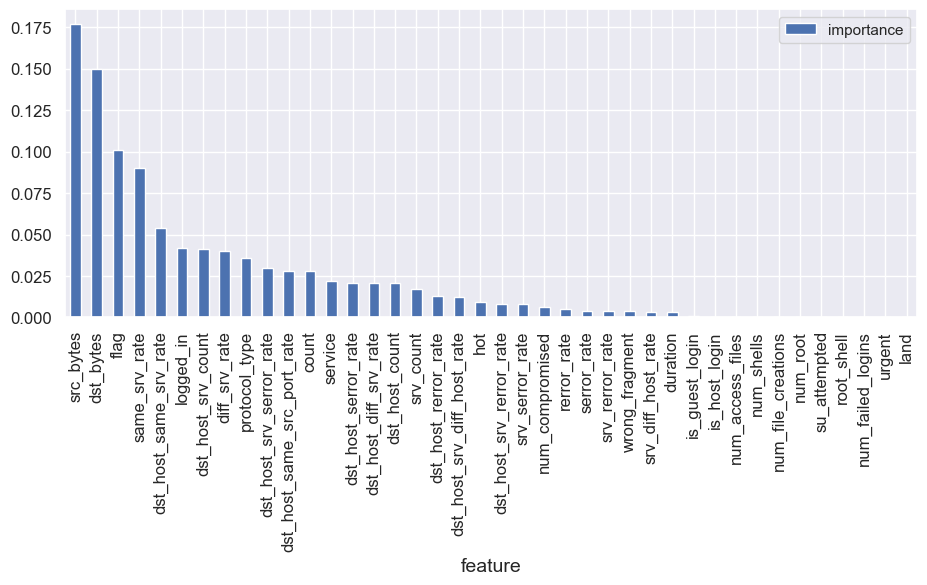

In [92]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(train_x, train_y);
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':train_x.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [93]:
from sklearn.feature_selection import RFE
import itertools
rfc = RandomForestClassifier()

# create the RFE model and select 10 attributes
rfe = RFE(rfc, n_features_to_select=15)
rfe = rfe.fit(train_x, train_y)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), train_x.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['src_bytes',
 'dst_bytes',
 'count',
 'srv_count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_srv_serror_rate',
 'protocol_type',
 'service',
 'flag']

In [94]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(train_x,train_y,train_size=0.70, random_state=2)

In [95]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train); 
# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train);

# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)
            
# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [96]:
from sklearn import metrics

models = []
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))

for i, v in models:
    scores = cross_val_score(v, X_train, Y_train, cv=10)
    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


============================== Naive Baye Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9071666840303904

Model Accuracy:
 0.9071679709651809

Confusion matrix:
 [[7000 1245]
 [ 392 8997]]

Classification report:
               precision    recall  f1-score   support

     anomaly       0.95      0.85      0.90      8245
      normal       0.88      0.96      0.92      9389

    accuracy                           0.91     17634
   macro avg       0.91      0.90      0.91     17634
weighted avg       0.91      0.91      0.91     17634



============================== Decision Tree Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9960869883971739

Model Accuracy:
 1.0

Confusion matrix:
 [[8245    0]
 [   0 9389]]

Classification report:
               precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00      8245
      normal       1.00      1.00      1.00      9389

In [97]:
for i, v in models:
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
    classification = metrics.classification_report(Y_test, v.predict(X_test))
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()   


============================== Naive Baye Classifier Model Test Results ==============================

Model Accuracy:
 0.906721354855782

Confusion matrix:
 [[2981  517]
 [ 188 3872]]

Classification report:
               precision    recall  f1-score   support

     anomaly       0.94      0.85      0.89      3498
      normal       0.88      0.95      0.92      4060

    accuracy                           0.91      7558
   macro avg       0.91      0.90      0.91      7558
weighted avg       0.91      0.91      0.91      7558



============================== Decision Tree Classifier Model Test Results ==============================

Model Accuracy:
 0.9947075946017465

Confusion matrix:
 [[3483   15]
 [  25 4035]]

Classification report:
               precision    recall  f1-score   support

     anomaly       0.99      1.00      0.99      3498
      normal       1.00      0.99      1.00      4060

    accuracy                           0.99      7558
   macro avg       0.99   

In [ ]:
# PREDICTING FOR TEST DATA using KNN
pred_knn = KNN_Classifier.predict(test_df)
pred_NB = BNB_Classifier.predict(test_df)
pred_log = LGR_Classifier.predict(test_df)
pred_dt = DTC_Classifier.predict(test_df)

# Challening Questions

### Q1. Where does ZeroAcess occur? Are there any patterns?

According to google, ZeroAccess is a type of malware that is primarily used to install other types of malware on infected computers. ZeroAccess has been known to target computers running the Windows operating system, and it is primarily spread through drive-by downloads and via malicious spam emails.

When searching on the internet I did not find any information that there is no specific geographic region or type of computer that is more likely to be targeted by ZeroAccess. However, looking at the visualizations from this assignment i prints a different story.

First thing that stands out is that the amount of attacks accure more often in well deleveloped countries. This is no supprise since there is more people that have acess to the internet, and more people and stronger economies will result in higher success rate of malware attack. 

From the heatmaps, diagrams etc, we can see that most attacks accures in the US, followed by europe and south-east asia+ Japan, korea etc. This is what created my thesis from the above statement. Whereas, the lowest amount of attacks happen within Africa, which would strenghten our thesis since it's the continent with the least amount of people having access to the internet.

### Q2. Are there any specific types of users that are easily affected? Is education or income affect its infection rate?

Looking at the correlation matrix that were created in this assignemnt, we can see that the lowest correlation to attacks is income, which indicates that there is no specific type of user that is more likely to be affected by ZeroAccess or any other type of malware. Malware can infect computers belonging to people of any age, education level, or income level.

However, the highest correlation to attacks was population and ipaddrs. To be honest I do not know what ipaddres in our dataset stands for, but assume it's IP-addresses. Which could be an indication that specific areas are more vonarable to attack. A reasoning for this could be that big companies can suffer from this malware, which than directly exposes the whole companiy with sometimes hundred of computers connected to the same internet.

That being said, from my interpritation of this data, users who frequently download software from untrusted sources or who open email attachments from unknown senders may be more at risk of infection. Similarly, users who work in industries that handle sensitive information or who have access to valuable resources may be targeted by malware as a way for attackers to gain access to these resources.

Reasoning behind this is because the logic behind the first question. I think that the biggest and most esablished IT-companies are located in the US, europe and parts of asia, thus making them a bigger target, as well as more people who browsing the internet, which increases the risk of mistakes.

### Q3. Plot a figure to show the number of attacks in the top 5 countries with respect to the number of attacks.

In [177]:
top = df.groupby('country_code').size().sort_values(ascending=False).reset_index()
top.columns=['countryCode', 'attacks']
top = top.set_index(top['countryCode'])
top.drop(['countryCode'], axis=1, inplace=True)
top.head(5)

,attacks
countryCode,
US,23987
CA,2966
GB,2564
JP,1504
AU,1501


<AxesSubplot:xlabel='countryCode'>

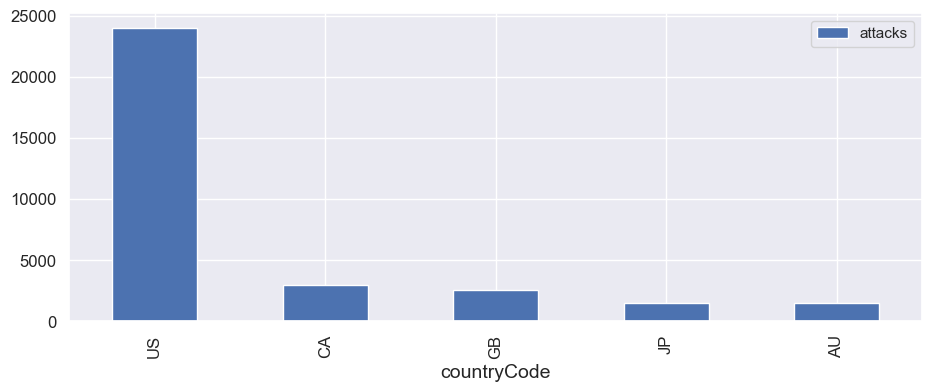

In [178]:
top.head(5).plot.bar()


### Q4. Which state and city have a severe attack? and why?


This question is subjective, and can be answered differently depending on how you look at it. But I think that there is two ways you can look at it:

1. California and Texas has the most severe attacks since they have the most attacks, and by far the most attacks in procentage to the total amount of attacks.
However, this point is missing that these states also have a lot of inhabitants, making the data a bit scewed in a way that they have the most attack, but they also have the most inhabitants which would automatically results in most attacks.

2. Wyoming and District of Columbia	has the most severe attacks since they have the most attacks by capita. Meaning that if you live in any of these states, you have a higher chance of experiencing a cyber attack.
However, this datapoint can be a bit scewed if the population is very low. For example, if one of the biggest company in this state experience a severe cyber attack, that might be a big population of the whole that that worked or had service with that company.

My personal view is leaning towards number 2. This is because more people compared to the size of the state is affected. I think that the higher the chance is that you experince an attack, the more severe the situation is. Thus my answer is Wyoming and columbia.

### Q5. What do you get from the following code snippet and why? Explain the output with logic.


In [313]:
us_count = us_df.groupby('State').size().sort_values(ascending=False).reset_index()
us_count.columns=['state', 'attack']
us_count['att_pc'] =us_count['attack']/us_count.attack.sum()
us_count = us_count.set_index(us_count['state'])
us_count.drop(['state'], axis=1, inplace=True)
us_count.head(5)
# print(us_count['att_pc'].sum())

,attack,att_pc
state,,
California,2293,0.095593
Texas,2003,0.083504
Florida,1425,0.059407
Kansas,1371,0.057156
New York,1315,0.054821


Above snipptet is that we are creating a dataframe where all the data is grouped by each state. Since it's grouped by states, we can see the amount of attacks for each state. In addition to this, we add another column which is the amount of attacks divided by the total amount of attacks. This enables us to then being able to see the amount of cyber attacks on each state, as well as the procentage of the total amout of attacks. So for example, Californa has 0.0955,which indicates that 9% of the total amount of attacks accured in Californa. 

If we use, we can confirm this by using # print(us_count['att_pc'].sum()), which print 1. Meaning that the total amount of att_pc is 100%.

In [312]:
us_pop=state_df[['state','population']]
us_pop['pop_pc'] =state_df.population/state_df.population.sum()
us_pop= us_pop.set_index(us_pop['state'])
us_pop.drop(['state'], axis=1, inplace=True)
us_pop.head(5)

,population,pop_pc
state,,
Alabama,4758191,0.015438
Arizona,6665093,0.021625
Arkansas,2919815,0.009473
California,37350092,0.121181
Colorado,5077553,0.016474


This snipped shows the same as the above snippet, only differnce is that instead of the amount of cyber attacks, we can see the population of that area as well as the procentage of the whole population of america.

### Q6. How is the attack or infection rate in each state related to the state population? What  is the best plot to present these results with? Plot it and explain the output with a valid  explanation.

In [355]:
us_pop = us_df.groupby('State').size().sort_values(ascending=False).reset_index()
us_pop=state_df[['state','population']]
us_pop['attack_per_capita'] =us_count.attack.sum()/us_pop['population']
us_pop= us_pop.set_index(us_pop['state'])
us_pop.drop(['state'], axis=1, inplace=True)

#Creating variables, one for all states, one for top 10
us_pop = us_pop.sort_values(by=['attack_per_capita'], ascending=False)
us_pop_top10 = us_pop.sort_values(by=['attack_per_capita'], ascending=False).head(10)


,population,attack_per_capita
state,,
Wyoming,549990,0.043614
District of Columbia,605959,0.039585
Vermont,628294,0.038178
North Dakota,653642,0.036697
South Dakota,820920,0.029220
Delaware,894424,0.026818
Montana,985235,0.024346
Rhode Island,1064277,0.022538
Maine,1332155,0.018006


Above I have created a dataframe that shows the population of a state. In addition, I've also added a column which shows the amount of attack per person in that state, I've also sorted the dataframe based on decinding values for the amount off attack per inhabitant.

So, the dataframe above tells us the most attacked state, based on their size population. To explain further, we can see that Wyoming is the highest with 0.04, which tells us that there should be 4 cyber attacks for every 100 inhabitants.

How to plot is however, is depending on what you want to show. When comparing many different states to eachother with for one metric, I like the scatter plot. However, if we want to show more metrics this is no longer the most sufficent one. In addition, I also think a bar diagram would be more sufficent if we only wanted to visualize the top 10 most affected states.

But since we only want to show the relationship between two sets of data for many differnt states, I think that scatter plot is the best one for most cases when showing relationship between two sets of data. But will also plot out a bar with the top 10

In [360]:
px.bar(
    us_pop.head(10),
    x=us_pop_top10.index,
    y='attack_per_capita',
    title='The states with most cyber attacks based on their population (attack per capita)',
    height=500,
    width= 800)

In [362]:
px.scatter(
    us_pop,
    x=us_pop.index,
    y='attack_per_capita',
    title='Cyber attacks on states based on their population (attack per capita)',)

### Q7. Plot interactive bar plot for top 20 worst affected countries by covid-19 till date which  shows the actual number of deaths and recovered covid-19 patients in that affected  country based on hovering the mouse over the bar for that country.

In [274]:
px.bar(
    sorted_country_df.head(20),
    x='country',
    y=['confirmed','deaths','recovered'],
    title='Top 20 worst affected countries of confirmed Covid-19 cases + recovered cases',
    height=500,
    width= 800)

In [279]:
import plotly.graph_objects as go


country= sorted_country_df.country.head(20)
confirmed= sorted_country_df.confirmed.head(20)
deaths= sorted_country_df.deaths.head(20)
recovered= sorted_country_df.recovered.head(20)


fig = go.Figure()
fig.add_trace(go.Bar(x=country, y=confirmed,
                base=0,
                marker_color='crimson',
                name='confirmed'))
fig.add_trace(go.Bar(x=country, y=recovered,
                base=0,
                marker_color='green',
                name='recovered'
                ))
fig.add_trace(go.Bar(x=country, y=deaths,
                base=-1000000,
                marker_color='lightslategrey',
                name='deaths'
                ))


fig.show()